## Описание проекта.

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Загрузка данных и подготовка их к анализу.

### Импорт необходимых библиотек:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests
from plotly import graph_objects as go
from IPython.core.display import display, HTML

### Загрузка и изучение данных.

In [28]:
data = pd.read_csv('/datasets/rest_data.csv')
display(HTML("<font color='green'>-------------------------------------</font>"))
display(HTML("<font color='green'>ОБЩАЯ ИНФОРМАЦИЯ</font>"))
display(HTML("<font color='green'>-------------------------------------</font>"))
data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


### Подсчёт количества дубликатов.

In [29]:
print("Дублирующихся строк в таблице:", data.duplicated().sum())

Дублирующихся строк в таблице: 0


### Подсчёт количества пропусков.

In [30]:
print("Пропусков в таблице:", data.isna().sum().sum())

Пропусков в таблице: 0


###### Выводы:

1.Типы данных верные.

2.Пропуски отсутствуют.

3.Дубликаты отсутствуют.

## Анализ данных.

### Исследуем соотношение видов объектов общественного питания по количеству. 

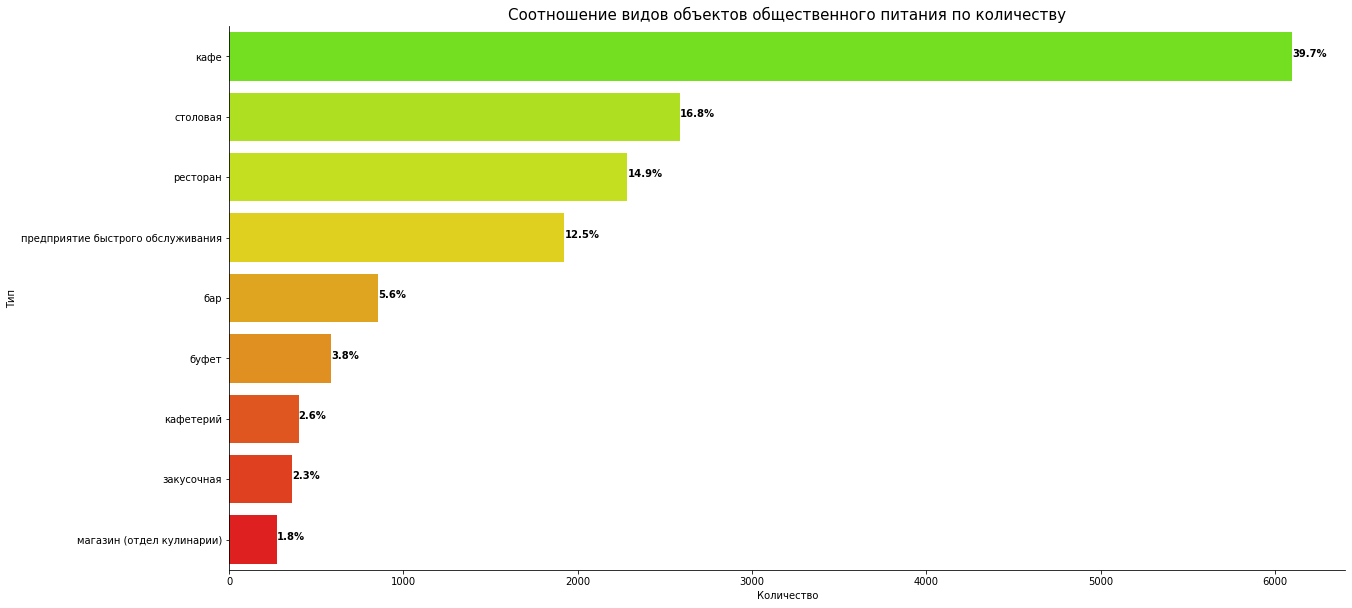

In [31]:
data_type = data.groupby('object_type').count().sort_values(by = 'id', ascending = False).reset_index()
bar,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(y="object_type", data=data, order=data_type['object_type'], palette="prism_r")

ax.set_title("Соотношение видов объектов общественного питания по количеству", fontsize=15)
ax.set_xlabel ("Количество")
ax.set_ylabel ("Тип")

sns.despine()

# вывод %
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% (rect.get_width()/len(data)*100), weight='bold' )

###### Выводы:

Кафе в 2.5 раза больше чем столовых. В лидерах кафе, столовая, ресторан, предприятия быстрого обслуживания.

### Исследуем соотношение сетевых и несетевых заведений по количеству.

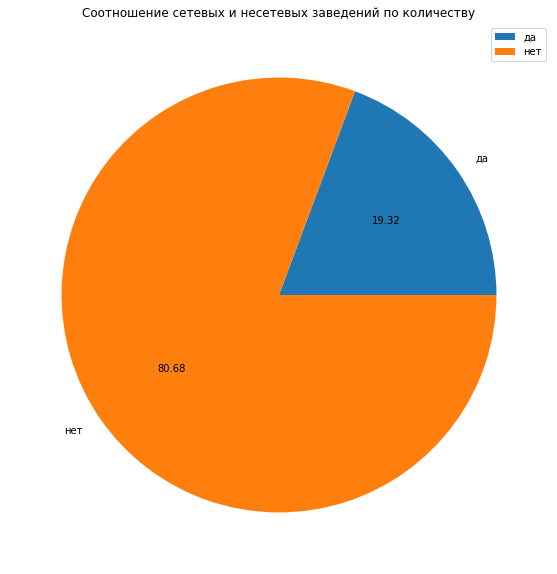

In [32]:
data_chain = data.groupby('chain').count()
ax = data_chain.plot(kind = 'pie', x = 'chain', y='id', figsize=(15, 10),
                     title = 'Cоотношение сетевых и несетевых заведений по количеству', autopct="%.2f")
ax.set_ylabel('')
plt.show()

###### Выводы:

Несетевых заведения более чем в 4 раза больше чем чем сетевых.

### Для какого вида объекта общественного питания характерно сетевое распространение.

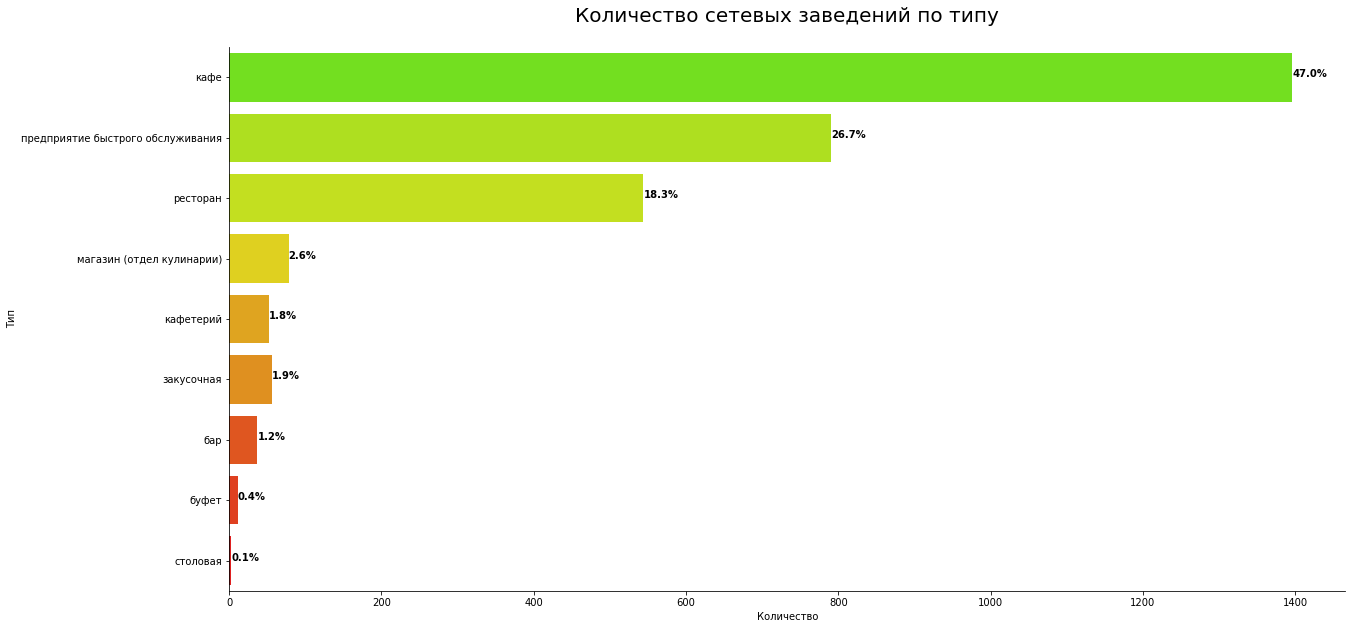

In [33]:
chain_yes = data.query('chain == "да"')

bar,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(y="object_type", data=chain_yes, palette="prism_r")

ax.set_title("Количество сетевых заведений по типу", fontsize=20, pad=25)
ax.set_xlabel ("Количество")
ax.set_ylabel ("Тип")

sns.despine()

# вывод %
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,\
             "%.1f%%"% (rect.get_width()/len(chain_yes)*100), weight='bold')

NameError: name 'bar_annotate' is not defined

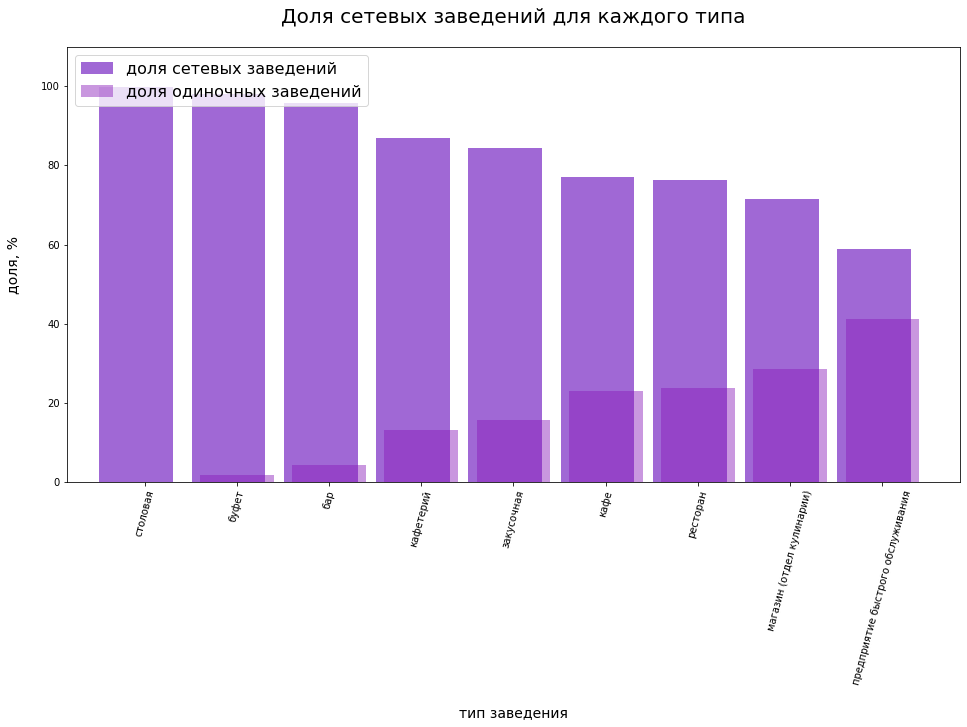

In [34]:
df = data.pivot_table(
                      index='object_type',
                      columns='chain',
                      values='id',
                      aggfunc={'count'}
                     )
df.columns = ['single', 'net']                                 
df['net_percent'] = df.net / (df.single + df.net) * 100        
df['single_percent'] = df.single / (df.single + df.net) * 100  
df = df.sort_values('single_percent').reset_index()


# график

fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(
            data=df,
            x='object_type',
            y='net_percent',
            color = '#8A2BE2',
            alpha=0.8,
            label='доля сетевых заведений'
           )

for patch in ax.patches:
    patch.set_x(patch.get_x() - 0.09)   

sns.barplot(
            data=df,
            x='object_type',
            y='single_percent',
            color = "#9400D3",
            alpha=0.45,
            label='доля одиночных заведений'
           )

ax.set_title('Доля сетевых заведений для каждого типа', fontsize=20, pad=25)
ax.set_xlabel('тип заведения', fontsize=14, labelpad=20)
ax.set_ylabel('доля, %', fontsize=14, labelpad=20)
plt.xticks(rotation=75);
ax.margins(0.05, 0.1)
ax.legend(fontsize=16, loc='upper left')
bar_annotate(ax, 1)


plt.show()

###### Выводы:

Более характерно сетевое распространения для кафе, предприятия быстрого обслуживания и ресторанов. В расчёте по долям лидируют предприятия быстрого питания.

### Что характерно для сетевых заведений.

In [35]:
chains = chain_yes.groupby('object_name').agg({'id': 'count', 'number': 'mean'})

In [36]:
chains['rest_group'] = pd.qcut(chains['id'], q = [0, 0.75, 1], labels =['Мало заведений', 'Много заведений'])
chains['num_group'] = pd.qcut(chains['number'], q = [0, 0.5, 1], labels = ['Мало мест','Много мест'])

In [37]:
chains['group'] = chains['rest_group'].astype(str) + ' - ' + chains['num_group'].astype(str)

(Text(0.5, 0, 'Количество заведений'),
 Text(0, 0.5, 'Среднее количество посадочных мест'))

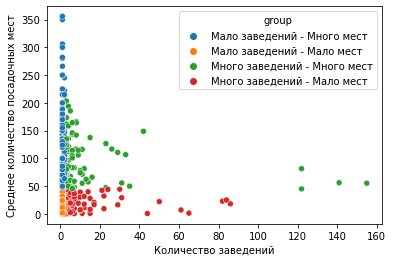

In [38]:
sns.scatterplot(x = 'id', y = 'number', hue = 'group', data = chains)
plt.xlabel('Количество заведений'), plt.ylabel('Среднее количество посадочных мест')

In [39]:
chains_number = chain_yes.groupby('object_type').agg({'id': 'count', 'number': 'mean'}).reset_index().sort_values(by = 'number', ascending = False)
chains_number

,object_type,id,number
8,столовая,3,112.333333
7,ресторан,544,100.233456
0,бар,37,53.027027
3,кафе,1396,47.426934
6,предприятие быстрого обслуживания,791,40.166877
2,закусочная,56,14.375000
1,буфет,11,12.727273
4,кафетерий,52,12.269231
5,магазин (отдел кулинарии),78,8.679487


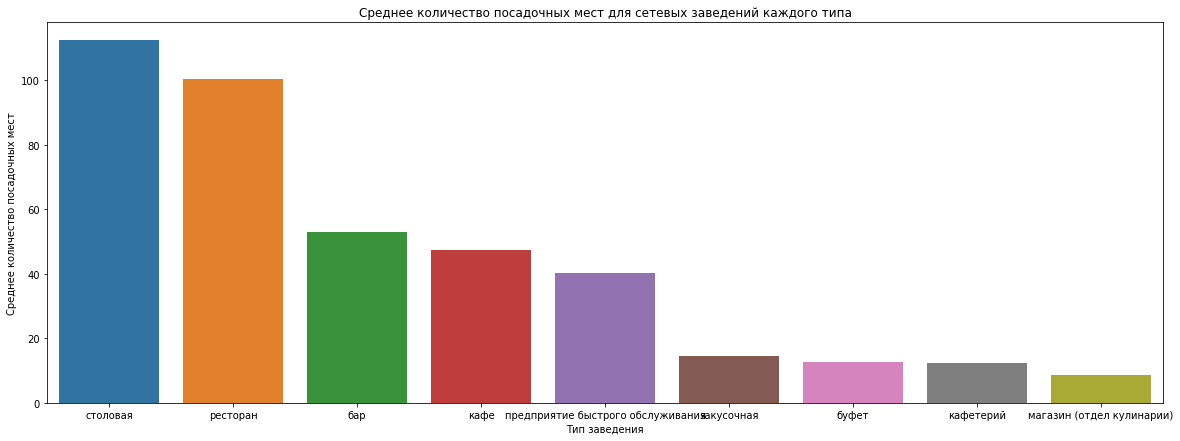

In [40]:
plt.figure(
    figsize=(20, 7))
ax = sns.barplot(x='object_type', y ='number', data=chains_number)
ax.set(xlabel = 'Тип заведения', ylabel ='Среднее количество посадочных мест', title='Среднее количество посадочных мест для сетевых заведений каждого типа')
plt.show()

###### Выводы:

Для сетевых заведений не характерно иметь много заведений и много мест, скорее всего это рестораны и столовые. Много заведений и мало мест чаще всего в заведениях из категорий предприятия быстрого питания и кулинария.

### Для каждого вида объекта общественного питания опишим среднее количество посадочных мест.

In [41]:
data_type_num = data.groupby('object_type')[('number')].mean().sort_values(ascending = False).reset_index()
data_type_num

,object_type,number
0,столовая,130.246618
1,ресторан,96.834136
2,буфет,51.129915
3,бар,43.494159
4,кафе,39.716019
5,предприятие быстрого обслуживания,20.552262
6,кафетерий,9.123116
7,закусочная,7.608333
8,магазин (отдел кулинарии),5.589744


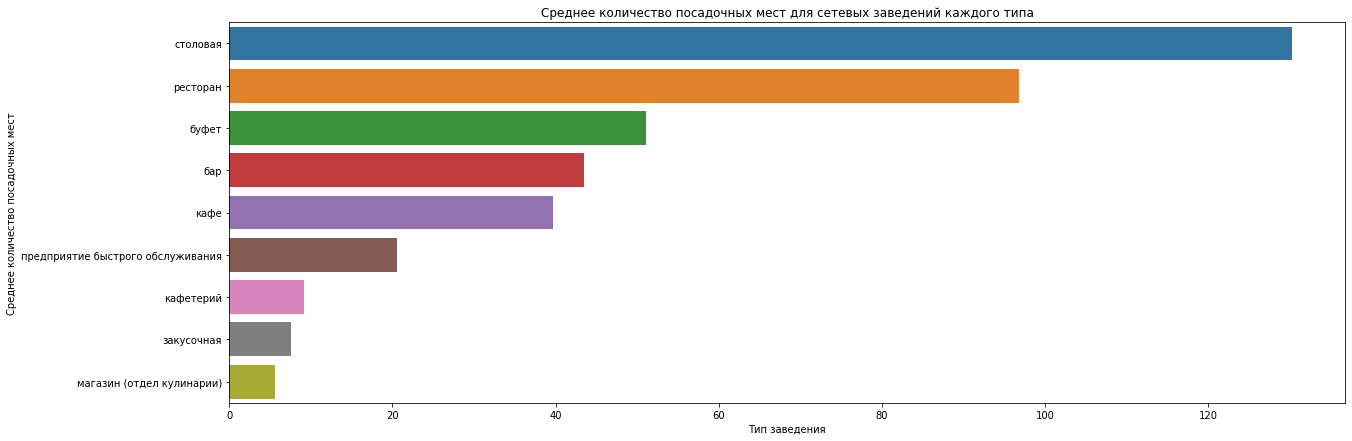

In [42]:
plt.figure(
    figsize=(20, 7))
ax = sns.barplot(x="number", y='object_type', data=data_type_num) 
ax.set(xlabel = 'Тип заведения', ylabel ='Среднее количество посадочных мест', title='Среднее количество посадочных мест для сетевых заведений каждого типа')
plt.show()

###### Выводы:

Столовые и рестораны лидируют по среднему количеству посадочных мест - это очевидно.

Предприятия быстрого питания, кафетерий, закусочная и кулинария не ориентированы на длительное времяпрепровождение в заведении, в них не требуется большое количество посадочных мест.

### Выделим в отдельный столбец информацию об улице из столбца address.

In [43]:
list_for_street = ['проспект', "площадь", "улица", "шоссе", 
                   "бульвар", 'переулок','набережная','проезд',
                   'тупик','микрорайон','территория','километр','посёлок','деревня'
                   ,'аллея','просек','линия','квартал','село','вблизи' ]
def get_street(row):
    address = row['address'].split(', ') 
    parts = len(address)
    try:
        for item in list_for_street:
            for i in range(parts):
                if item in address[i]:  
                    return address[i]
    except:
        return 'Error'
    
data['street'] = data.apply(get_street, axis=1)

In [44]:
data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


## Постройте график топ-10 улиц по количеству объектов общественного питания.

In [45]:
top_10 = data.groupby('street')['object_name'].count().reset_index().sort_values(by = 'object_name',
                                                                                 ascending = False).head(10)
display(top_10)

,street,object_name
1499,проспект Мира,204
1040,Профсоюзная улица,183
713,Ленинградский проспект,173
1024,Пресненская набережная,167
426,Варшавское шоссе,165
716,Ленинский проспект,148
1495,проспект Вернадского,132
703,Кутузовский проспект,114
626,Каширское шоссе,112
633,Кировоградская улица,110


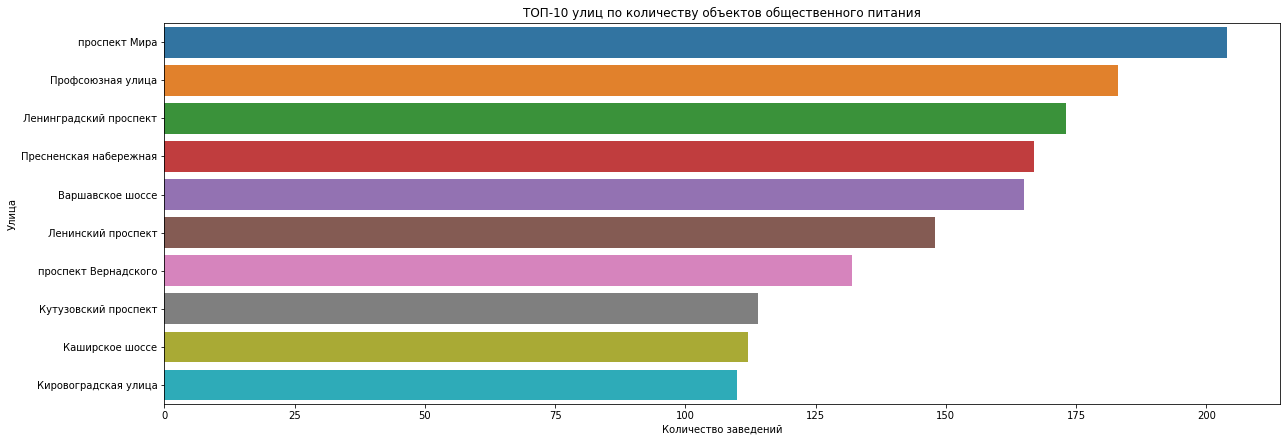

In [46]:
plt.figure(
    figsize=(20, 7))
ax = sns.barplot(x="object_name", y='street', data=top_10) 
ax.set(xlabel = 'Количество заведений', ylabel ='Улица', 
       title='ТОП-10 улиц по количеству объектов общественного питания')
plt.show()

###### Выводы:

Больше всего заведений находится на проспекте Мира.

### В каких округах Москвы находятся эти улицы?

In [47]:
spreadsheet_id = "1sguZSB8CeYCbCK2eMmsAlMkz9mBFw11GlyImzqJpjes"
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df

,street,areaid,okrug,area
0,1-й Автозаводский проезд,98,ЮАО,Даниловский район
1,1-й Амбулаторный проезд,54,САО,Район Аэропорт
2,1-й Архивный переулок,20,ЦАО,Район Хамовники
3,1-й Бабьегородский переулок,21,ЦАО,Район Якиманка
4,1-й Балтийский переулок,54,САО,Район Аэропорт
...,...,...,...,...
4393,Яузская улица,18,ЦАО,Таганский район
4394,Яузский бульвар,18,ЦАО,Таганский район
4395,Яхромская улица,60,САО,Дмитровский район
4396,Яхромский проезд,58,САО,Район Восточное Дегунино


In [48]:
rest_data = data.merge(df, on = 'street', how='left')

In [49]:
top_10_streets = top_10['street'].to_list()
top_10_count_on_district = rest_data.query('street == @top_10_streets')
top_10_count_on_district.pivot_table(index=['street', 'okrug'], values='id', aggfunc='count')

top_10_district = rest_data.groupby(['okrug','street']).agg({'id':'count'}).sort_values(by='id', 
                                                                                  ascending=False).head(10).reset_index()
top_10_district

,okrug,street,id
0,СВАО,проспект Мира,1224
1,ЮЗАО,Профсоюзная улица,1098
2,ЮАО,Варшавское шоссе,990
3,САО,Ленинградский проспект,692
4,ЮЗАО,Ленинский проспект,592
5,САО,Ленинградское шоссе,500
6,САО,Дмитровское шоссе,500
7,ЮАО,Каширское шоссе,448
8,ЗАО,проспект Вернадского,396
9,ЮВАО,Волгоградский проспект,378


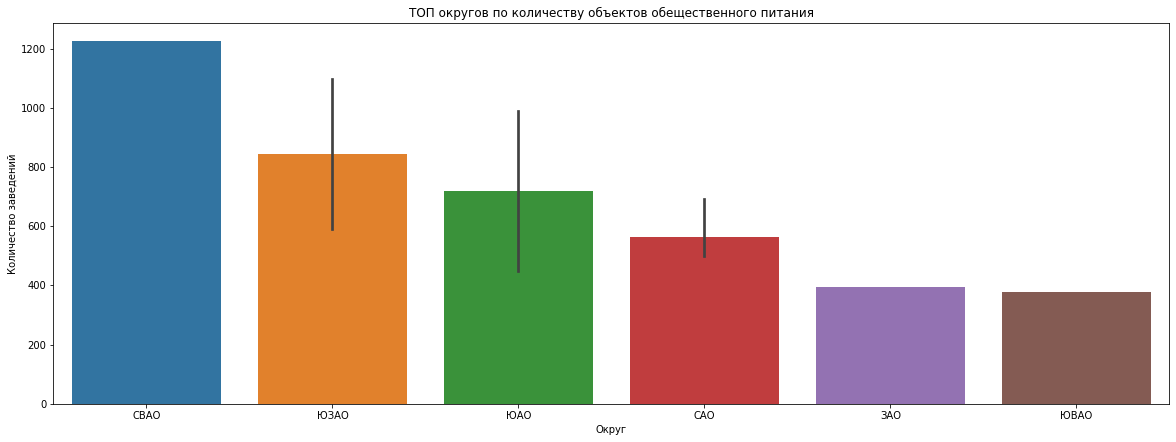

In [50]:
plt.figure(
    figsize=(20, 7))
ax = sns.barplot(x='okrug', y ='id', data=top_10_district)
ax.set(xlabel = 'Округ', ylabel ='Количество заведений', 
       title='ТОП округов по количеству объектов обещественного питания')
plt.show()

### Найду число улиц с одним объектом общественного питания.

In [51]:
streets_count = rest_data.groupby(['area','street'])['object_name'].count().reset_index()
streets_one_object = streets_count[streets_count['object_name'] == 1]
print("Количество улиц с одним заведением:", streets_one_object['street'].count())

Количество улиц с одним заведением: 567


### В каких районах Москвы находятся эти улицы?

In [52]:
area_one_object= streets_one_object.groupby('area').count()
print("Топ-10 районов, в которых находятся улицы с одним заведением:")
display(area_one_object.sort_values(by = 'object_name', ascending = False).head(10))

Топ-10 районов, в которых находятся улицы с одним заведением:


,street,object_name
area,,
Таганский район,27,27
Район Хамовники,26,26
Басманный район,25,25
Тверской район,20,20
Пресненский район,20,20
Район Арбат,18,18
Район Марьина роща,18,18
Мещанский район,16,16
Район Сокольники,15,15


## Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


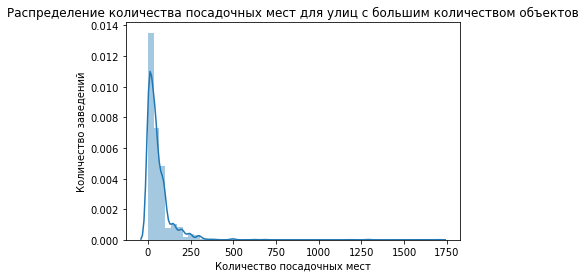

In [53]:
ax = sns.distplot(top_10_count_on_district['number'], bins = 50) 
ax.set(xlabel = 'Количество посадочных мест', ylabel ='Количество заведений', 
       title='Распределение количества посадочных мест для улиц с большим количеством объектов')
plt.show()

Есть выбросы, исключу заведения с количеством посадочным мест более 250.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


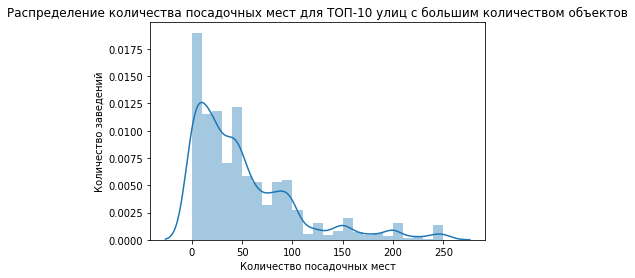

In [54]:
top_10_number = top_10_count_on_district[top_10_count_on_district['number'] <= 250]
ax = sns.distplot(top_10_number['number'], bins=25)
ax.set(xlabel = 'Количество посадочных мест', ylabel ='Количество заведений', 
       title='Распределение количества посадочных мест для ТОП-10 улиц с большим количеством объектов')
plt.show()

Больше всего заведений без посадочных мест, работающих на заказы "с собой" или доставку, затем примерно одинаковое кол-во заведений имеют по 10, 20 и 40 мест, далее идет плавный спад.

## Общие выводы:

Мы выяснили, что большую долю заведений в Москве составляют кафе(их почти в 2.5 раза больше, чем остальных заведений), столовые, рестораны и фастфуд, при этом, доля сетевых заведений всего 20% от общего количества.

Наиболее характерно сетевое распространение для фастфуда, кулинарии и ресторанов. А также для сетей характерно иметь много заведений с небольшим количеством посадочных мест.

Найдены топ-10 улиц с наибольшим количеством заведений. Больше всего заведений, находящихся на улицах из топа, не имеют посадочных мест. А если посадочные места есть, то чаще всего их около 10, 20 или 40.

## Рекомендации.

Открыть кафе, так как это самый популярный вид заведений общественного питания.

Расположить его на одной из улиц из списка топ-10.

Количеств посадочных мест до 40.

Как возможности для развития можно рассмотреть открытие заведений с работой на доставку или заказы “с собой”, либо открытие ресторана/столовой с бОльшим количеством посадочных мест, а также развитие сети таких заведений.

## Ссыллка на презентацию.

https://disk.yandex.ru/i/3Lo01hZwM01cXw